# DSC550
# Week 4
# Victoria Hall
# 1/8/2022

## Loading libraries

In [75]:
#Loading libaries 
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics

## Prepping Data for Modeling

In [23]:
#Reading in dataset as panda df
auto_df = pd.read_csv('auto-mpg.csv')
auto_df.head(10)

#removing car name column
auto_df1 = auto_df.drop(['car name'], axis=1)
auto_df1.head(10)

#Checking data types
print(auto_df1.dtypes)
#Horsepower is object, meaning it contains strings

auto_df1.horsepower.unique()
#the values are saved as strings because one value is a ?

#Coercing values to numeric, errors should become nan
auto_df1['horsepower']=auto_df1.horsepower.apply(pd.to_numeric, errors='coerce')

#Rechecking types
auto_df1.dtypes


#finding mean
hp_mean = auto_df1.horsepower.mean()

print('Horsepower mean:', hp_mean)

#replacing missing value with mean. Setting inplace to true to modify original dataframe
auto_df1.horsepower.fillna(value=hp_mean, inplace=True)

#doublechecking missing value was replaced
auto_df1.horsepower.unique()

auto_df1.head()


mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object
Horsepower mean: 104.46938775510205


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [28]:
#Creating dummy variables from origin
auto_df1.origin.value_counts()
#There are 3 different values in origin.

#Using get_dummies from pandas based on our origin column
auto_df2=pd.get_dummies(auto_df1, columns=['origin'])
#Doublechecking it worked
auto_df2.tail()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0
397,31.0,4,119.0,82.0,2720,19.4,82,1,0,0


## Correlation Coefficient Matrix

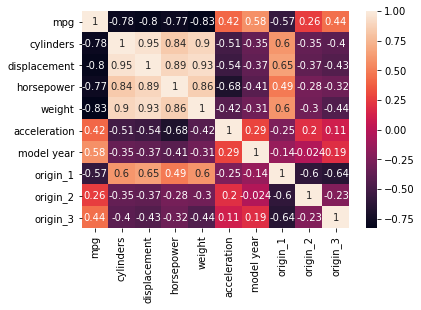

In [33]:
#Creating correlation matrix
corrmatrix=auto_df2.corr()

#Visualizing with heatmap
sn.heatmap(corrmatrix, annot=True)
plt.show()

MPG is highly correlated with cylinders,displacement, horsepower, and weight negatively. Weight is the most highly correlated to MPG

## Plot MPG Vs Weight

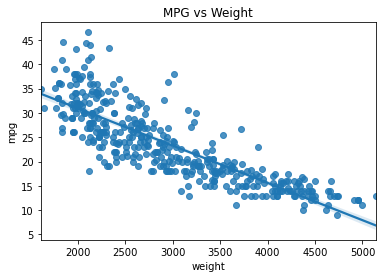

In [36]:
#Plotting 
sn.regplot(data=auto_df2, x='weight',y='mpg')
plt.title("MPG vs Weight")
plt.show()

Our scatter plot shows what we were starting to see in our heatmap. There appears to be a negative relationship between weight and mpg. I included a reg line though a straight line probably isn't the best model for the relationship. Still we see that as weight increases, mpg decreases.

## Splitting Training and Test Sets

In [43]:
#Creating features and target
x = auto_df2.drop('mpg',1)
y = auto_df2['mpg']

#Creating splits
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=.2)



,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
270,4,134.0,95.0,2515,14.8,78,0,0,1
234,4,151.0,88.0,2740,16.0,77,1,0,0
79,4,96.0,69.0,2189,18.0,72,0,1,0
57,4,113.0,95.0,2278,15.5,72,0,0,1
139,8,302.0,140.0,4638,16.0,74,1,0,0
...,...,...,...,...,...,...,...,...,...
363,6,231.0,110.0,3415,15.8,81,1,0,0
172,4,90.0,71.0,2223,16.5,75,0,1,0
136,8,302.0,140.0,4141,14.0,74,1,0,0
185,4,98.0,79.0,2255,17.7,76,1,0,0


## Training OLS on training data

In [65]:
olsmodel=LinearRegression()
olsmodel.fit(x_train,y_train)
print(olsmodel.coef_)

[-0.39357743  0.02430239 -0.02077235 -0.0071781   0.04177787  0.75626279
 -1.66952101  0.53134324  1.13817778]


## Calculate R2, RMSE, and MAE on training and test set

In [74]:
#Running model on test
y_pred = olsmodel.predict(x_test)

#MAE
print('MAE of Test Data:',metrics.mean_absolute_error(y_test,y_pred))

#RMSE
print('RMSE of Test Data:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

#R2
print('R2 of Test Data:',metrics.r2_score(y_test,y_pred))

#Calculating on Training
y_pred_train = olsmodel.predict(x_train)
#MAE
print('MAE of Training Data:',metrics.mean_absolute_error(y_train,y_pred_train))

#RMSE
print('RMSE of Training Data:',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))

#R2
print('R2 of Training Data:',metrics.r2_score(y_train,y_pred_train))



MAE of Test Data: 2.6023205520457737
RMSE of Test Data: 3.4956052311409125
R2 of Test Data: 0.7915718616481714
MAE of Training Data: 2.4988049712788354
RMSE of Training Data: 3.228979316187294
R2 of Training Data: 0.8299367918735778


In all instances our model performed better on the training data, which makes sense because the model was created off that data. In order to make generalizations, we ran the model on our test data and our results show the model performed slightly worse. The differences weren't hugely significant. 

1. Mean Absolute Error
    - Our test data only had a slightly higher mean error of 2.6 compared to 2.5 on our training data. This means on average, our model predicted mpg with an average error betweeen 2.5 and 2.6 miles per gallon.
    
2. Root Mean Square Error
    - Again, our test data only slightly differed than predictions on our training data. This metric tells us the average distance between our observed data values and predicted values. We see a distance between 3.2 and 3.5 between our actual values and our predicted values.
    
3. R Squared
    - Our R squared values are similar too. On the test data, our model is able to account for 79% of the variation in our data, while it accounts for 83% of test data. These numbers are generally high, closer to 1 than 0, showing our model is probably a good fit for our data. 

## Using a Ridge Regression Model

In [92]:
ridgemodel=Ridge(alpha=3)
ridgemodel.fit(x_train,y_train)
print(ridgemodel.coef_)

#Running ridge model on test
y_pred1 = ridgemodel.predict(x_test)

#MAE
print('Ridge MAE of Test Data:',metrics.mean_absolute_error(y_test,y_pred1))

#RMSE
print('Ridge RMSE of Test Data:',np.sqrt(metrics.mean_squared_error(y_test,y_pred1)))

#R2
print('Ridge R2 of Test Data:',metrics.r2_score(y_test,y_pred1))

#Calculating on Training
y_pred_train1 = ridgemodel.predict(x_train)
#MAE
print('Ridge MAE of Training Data:',metrics.mean_absolute_error(y_train,y_pred_train1))

#RMSE
print('Ridge RMSE of Training Data:',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train1)))

#R2
print('Ridge R2 of Training Data:',metrics.r2_score(y_train,y_pred_train1))


[-0.37384828  0.02335387 -0.02005332 -0.00718163  0.04026839  0.75453287
 -1.58494873  0.5026254   1.08232332]
Ridge MAE of Test Data: 2.6054695285858727
Ridge RMSE of Test Data: 3.5009995045405127
Ridge R2 of Test Data: 0.7909280899469445
Ridge MAE of Training Data: 2.498592703477715
Ridge RMSE of Training Data: 3.229297334241361
Ridge R2 of Training Data: 0.8299032916070777


Again we see very similar results between the models performance on the training data and the test data. The values barely changed, even as I adjust and played with different alpha values. If I went to extremes, such as alpha=10000 we do see reductions in our R2 values which means we are overpenalizing our coefficients and thus explaining less of the variance. This model would probably perform better on a more complex model as the the purpose of ridge regression would be to minimize the impacts of large coefficients caused by model complexity. In our data, the data has less than 10 features so it probably isn't necessary to run a ridge regression model. If it were necessary, we could use cross validation to help determine the best value of our hyperparameter, alpha. 

*I did not go into details about MAE, RMSE, and R2 for the ridge regression because the results were extremely similar to our OLS model. Instead I chose to highlight the differences in the purposes of the models and why we didn't see any drastic changes. 